In [7]:
import pandas as pd

In [509]:
data = pd.read_csv('/Users/dorothytam/Documents/Python_data_analyst_course/Hotel_Booking/hotel_bookings.csv')

In [511]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [513]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Data cleaning

In [515]:
#remove invalid rows, Adults,babies & children cant be zero at a same time bcz booking couldn't be possible if these 3 attributes are 0 
filter1 = (data['children']==0) & (data['adults']==0) & (data['babies']==0)
data1 = data[~filter1]  #four rows are removed

#remove duplicated data
data1.duplicated().sum()
df= data1.drop_duplicates()

In [ ]:
1)How many bookings are for each room type?

In [517]:
df['hotel'].unique() #there are two hotels, but in this analysis we treat them as one

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [519]:
#View the columns needed for reserved room type and assigned room type stacked bar chart
df[['reserved_room_type','assigned_room_type']][0:5]

,reserved_room_type,assigned_room_type
0,C,C
1,C,C
2,A,C
3,A,A
4,A,A


In [521]:
#Create assignment flag for same room and different room (Boolean True/False)
df["same_room"] = df["reserved_room_type"] == df["assigned_room_type"]

In [523]:
df[["same_room","reserved_room_type","assigned_room_type"]][0:5]

,same_room,reserved_room_type,assigned_room_type
0,True,C,C
1,True,C,C
2,False,A,C
3,True,A,A
4,True,A,A


In [525]:
#Aggregate counts per reserved room type+same_room combination
summary = (
    df.groupby(["reserved_room_type", "same_room"]) #columns combination for aggregation
      .size() #aggregate by counting
      .reset_index(name="count")) #set name for the new count column

In [527]:
summary

,reserved_room_type,same_room,count
0,A,False,10586
1,A,True,45850
2,B,False,124
3,B,True,872
4,C,False,48
5,C,True,866
6,D,False,1397
7,D,True,15979
8,E,False,578
9,E,True,5458


In [529]:
#Pivot for stacked bars
plot_df = summary.pivot(
    index="reserved_room_type",
    columns="same_room",
    values="count"
).fillna(0)

plot_df.columns = ["Not Assigned", "Assigned"]

In [531]:
plot_df[0:5]

,Not Assigned,Assigned
reserved_room_type,,
A,10586,45850
B,124,872
C,48,866
D,1397,15979
E,578,5458


In [533]:
#Adding extea columns for subplots
plot_df["Total"]=plot_df["Not Assigned"]+plot_df["Assigned"]

#creating percentage colunns for the second subplot
plot_df["No_assigned_perc"]=plot_df["Not Assigned"]/plot_df["Total"]*100 
plot_df["Assigned_perc"]=plot_df["Assigned"]/plot_df["Total"]*100

In [535]:
plot_df

,Not Assigned,Assigned,Total,No_assigned_perc,Assigned_perc
reserved_room_type,,,,,
A,10586,45850,56436,18.757531,81.242469
B,124,872,996,12.449799,87.550201
C,48,866,914,5.251641,94.748359
D,1397,15979,17376,8.039825,91.960175
E,578,5458,6036,9.575878,90.424122
F,184,2636,2820,6.524823,93.475177
G,51,1999,2050,2.487805,97.512195
H,17,579,596,2.852349,97.147651
L,5,1,6,83.333333,16.666667


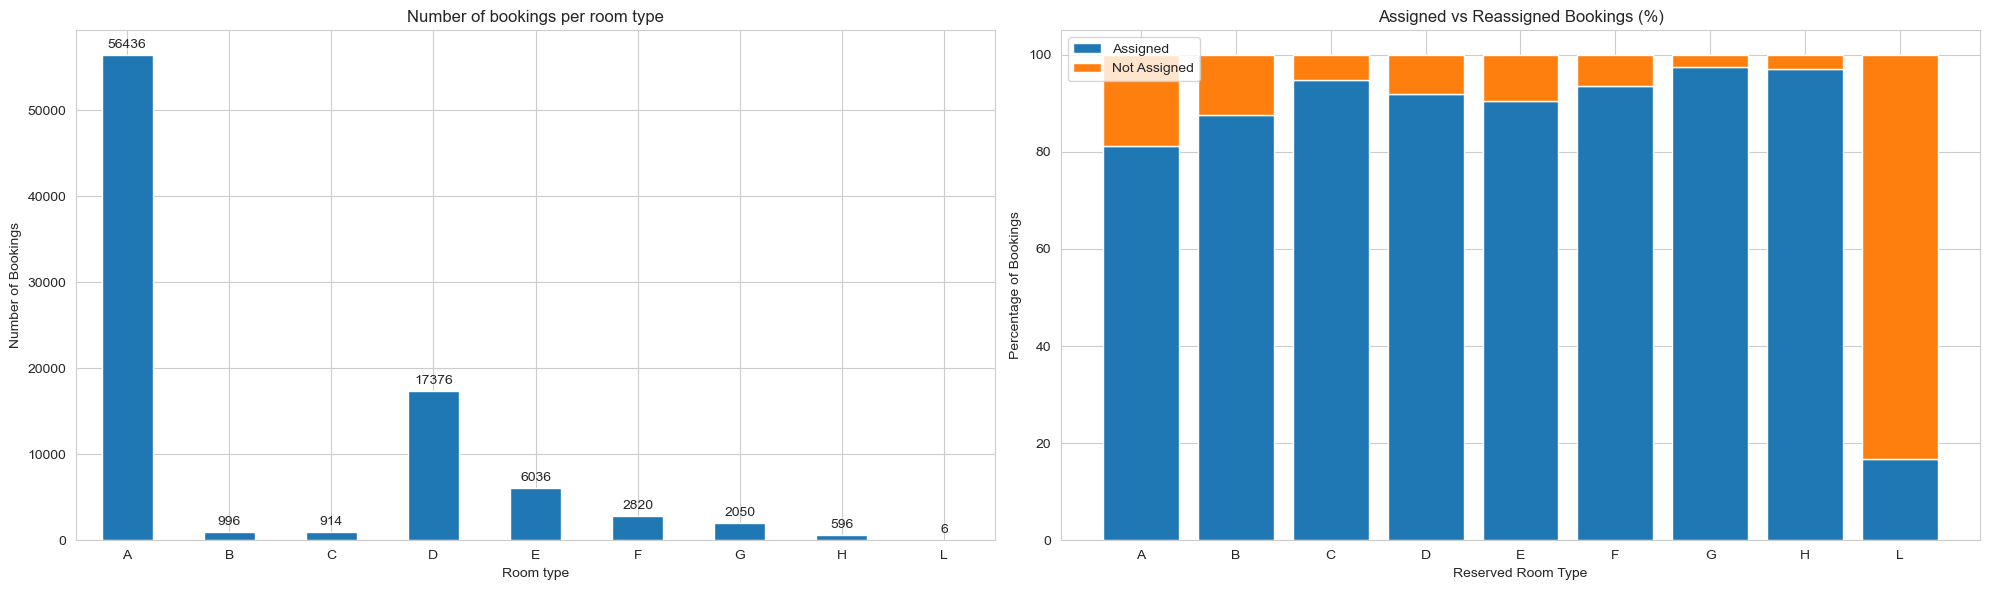

In [537]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))  # set the overall plot area

# ---- FIRST SUBPLOT: absolute counts ----
ax1 = plt.subplot(1,2,1)  # subplot position

# make the bar plot
plot_df['Total'].plot(kind='bar', ax=ax1)

plt.xticks(rotation=0)  
plt.title('Number of bookings per room type')
plt.xlabel("Room type")
plt.ylabel("Number of Bookings")

# ---- ADD DATA LABELS IN ONE LINE ----
ax1.bar_label(ax1.containers[0], padding=3)  # <-- just this one line adds labels to all bars

# ---- SECOND SUBPLOT: percentage stacked bars ----
ax2 = plt.subplot(1,2,2)
sns.set_style("whitegrid")

ax2.bar(
    plot_df.index,
    plot_df["Assigned_perc"],
    label="Assigned"
)

ax2.bar(
    plot_df.index,
    plot_df["No_assigned_perc"],
    bottom=plot_df["Assigned_perc"],
    label="Not Assigned"
)

plt.xlabel("Reserved Room Type")
plt.ylabel("Percentage of Bookings")
plt.title("Assigned vs Reassigned Bookings (%)")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
2) What is the proportion of bookings from different market segments?

In [539]:
#count aggregation, generate a Series
df['market_segment'].value_counts()

market_segment
Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: count, dtype: int64

In [541]:
#extract the value array
df['market_segment'].value_counts().values

array([51553, 13855, 11780,  4922,  4200,   692,   226,     2])

In [543]:
df['market_segment'].value_counts().index

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'],
      dtype='object', name='market_segment')

In [545]:
#install plotly properly
!pip install chart-studio
!pip install plotly

### establishing the entire set-up of Plotly..

import chart_studio.plotly as py
## chart_studio provides a web-service for hosting graphs!

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

## iplot() when working in a Jupyter Notebook to
## display the plot in the Ipython notebook.

init_notebook_mode(connected=True)

In [547]:
#rename the market segment column
name_map = {
    "Online TA": "Online Travel Agency",
    "Offline TA/TO": "Offline Travel Agent / Tour Operator",
    "Groups": "Group Bookings",
    "Direct": "Direct Bookings",
    "Corporate": "Corporate",
    "Complementary": "Complementary",
    "Aviation": "Aviation",
    "Undefined": "Undefined"
}
df['market_segment_clean'] = df['market_segment'].replace(name_map)

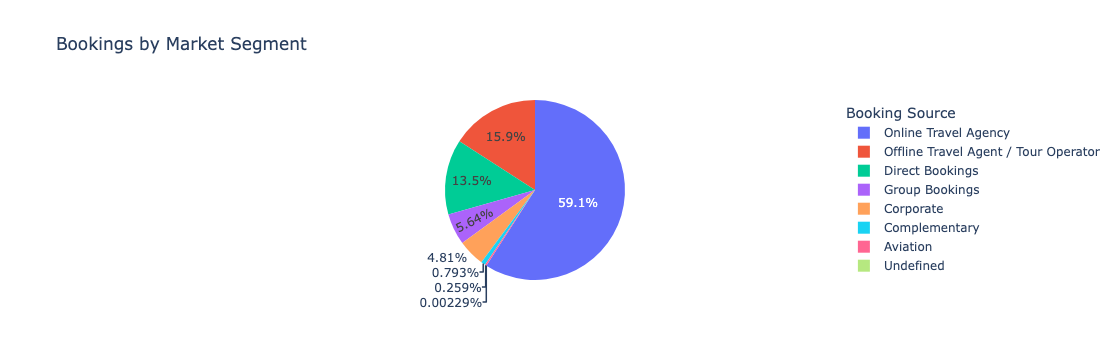

In [549]:
# pie plot
fig = px.pie(
    df,
    values=df['market_segment_clean'].value_counts().values,
    names=df['market_segment_clean'].value_counts().index,
    title="Bookings by Market Segment"
)

fig.update_layout(
    legend=dict(title="Booking Source")  # optional, rename the legend header
)

fig.show()

In [ ]:
Spatial analysis:  Where do the guests come from ?

In [199]:
not_cancelled = df[df['is_canceled']==0]
not_cancelled.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,same_room,market_segment_clean
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,True,Direct Bookings
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,True,Direct Bookings
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,False,Direct Bookings


In [207]:
x=not_cancelled['country'].value_counts()
x

country
PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: count, Length: 165, dtype: int64

In [209]:
country_wise_data = not_cancelled['country'].value_counts().reset_index() #make the first column the index 
country_wise_data.columns = ['country' , 'No of guests']

In [211]:
country_wise_data

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


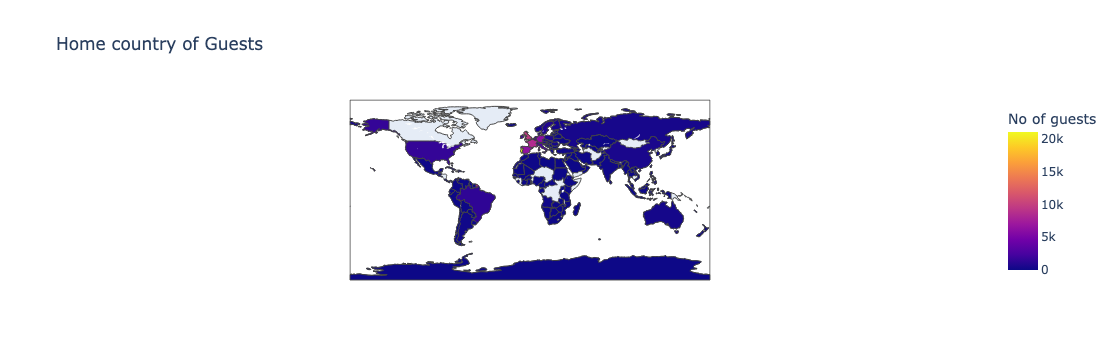

In [215]:
# show on map
map_guest = px.choropleth(data_frame = country_wise_data , 
              locations= country_wise_data['country'] , 
              color=country_wise_data['No of guests'] , 
              hover_name=country_wise_data['country'] , 
              title= "Home country of Guests"
             )
map_guest.show()

In [ ]:
Is there any seasonality in guest number arrival?

In [219]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,same_room,market_segment_clean
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,True,Direct Bookings
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,True,Direct Bookings
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,False,Direct Bookings


In [225]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [227]:
dict_month = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

In [229]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [231]:
df['arrival_date_month_index'] = df['arrival_date_month'].map(dict_month)

In [235]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'same_room',
       'market_segment_clean', 'arrival_date_month_index'],
      dtype='object')

In [245]:
df[['arrival_date_year',
       'arrival_date_month_index' , 'arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [241]:
#we need to use .astype(str) to convert int values to string , otherwise we are unable to perform this string concatenation operation

In [249]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month_index'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)

In [255]:
df[['arrival_date_year',
       'arrival_date_month_index' , 'arrival_date_day_of_month','arrival_date']][0:2]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month,arrival_date
0,2015,7,1,2015-7-1
1,2015,7,1,2015-7-1


In [261]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'same_room',
       'market_segment_clean', 'arrival_date_month_index', 'arrival_date'],
      dtype='object')

In [281]:
df[['adults', 'children', 'babies']][0:5]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0


In [271]:
df['Total_guests'] = df['adults'] + df['children'] + df['babies']

In [309]:
df[['arrival_date_year',
       'arrival_date_month_index' , 'arrival_date_day_of_month','arrival_date','Total_guests','reserved_room_type']][0:5]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month,arrival_date,Total_guests,reserved_room_type
0,2015,7,1,2015-7-1,2.0,C
1,2015,7,1,2015-7-1,2.0,C
2,2015,7,1,2015-7-1,1.0,A
3,2015,7,1,2015-7-1,1.0,A
4,2015,7,1,2015-7-1,2.0,A


In [467]:
dataNoCancel = df[df['is_canceled']==0]

In [485]:
dataNoCancel_A = df[(df['is_canceled'] == 0) & (df['reserved_room_type'] == 'A')]
dataNoCancel_A[['arrival_date','Total_guests','reserved_room_type']][0:5]

,arrival_date,Total_guests,reserved_room_type
2,2015-7-1,1.0,A
3,2015-7-1,1.0,A
4,2015-7-1,2.0,A
5,2015-7-1,2.0,A
17,2015-7-1,2.0,A


In [493]:
dataNoCancel_A_agg = dataNoCancel_A.groupby(['arrival_date'])['Total_guests'].sum()
dataNoCancel_A_agg

<Axes: xlabel='arrival_date'>

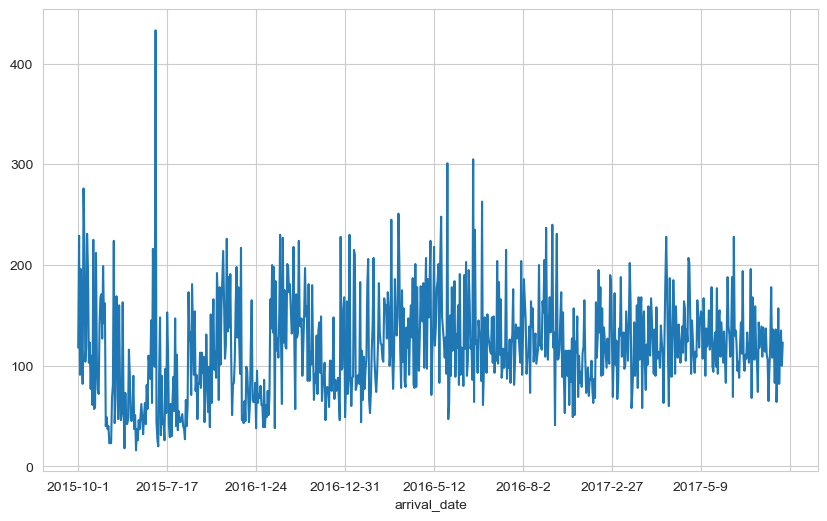

In [497]:
dataNoCancel_A_agg.plot(figsize=(10,6))

<Axes: xlabel='arrival_date'>

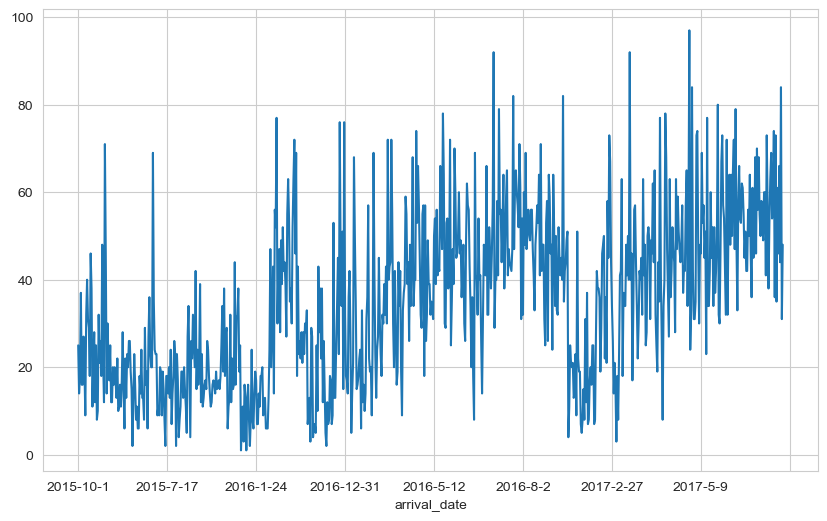

In [503]:
#there is some seasonality for room type D, between 2016 to 2017, the Total guests tends to be lower in winter and higher in summer
dataNoCancel_D = df[(df['is_canceled'] == 0) & (df['reserved_room_type'] == 'D')]
#dataNoCancel_A[['arrival_date','Total_guests','reserved_room_type']][0:5]
dataNoCancel_D_agg = dataNoCancel_D.groupby(['arrival_date'])['Total_guests'].sum()
#dataNoCancel_A_agg
dataNoCancel_D_agg.plot(figsize=(10,6))